In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# dimensions of data
n_samples = 16071
n_latitudes = 101 
n_longitudes = 161
shape = (n_samples, n_latitudes, n_longitudes)

In [3]:
# load data
ds = xr.open_dataset('.\\t2m.nc') # change to 't2m.nc' for temperature data
# visualize dataset content
print(ds)

<xarray.Dataset> Size: 1GB
Dimensions:    (time: 16071, longitude: 161, latitude: 101)
Coordinates:
  * time       (time) datetime64[ns] 129kB 1979-01-01T11:30:00 ... 2022-12-31...
  * longitude  (longitude) float32 644B 70.0 70.5 71.0 ... 149.0 149.5 150.0
  * latitude   (latitude) float32 404B 40.0 39.5 39.0 38.5 ... -9.0 -9.5 -10.0
Data variables:
    t2m        (time, latitude, longitude) float32 1GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/...
    history:      Mon Feb 05 11:56:32 2024: cdo -b 32 mergetime daily_2m_temp...
    Conventions:  CF-1.6
    frequency:    day
    CDO:          Climate Data Operators version 1.9.4rc1 (http://mpimet.mpg....


In [ ]:
# get data values
da = ds['t2m'] # 'msl' is the variable name for slp, change to 't2m' for temperature data
x = da.values
print(x)
print(x.shape)

[[[273.28217 272.29355 272.3532  ... 278.57904 278.7337  278.90683]
  [260.34695 257.77417 255.57187 ... 279.697   279.75113 279.85916]
  [267.08688 265.21936 261.89755 ... 280.44757 280.40872 280.45724]
  ...
  [299.5844  299.59753 299.64648 ... 299.56076 300.1212  300.32434]
  [299.5824  299.66254 299.65182 ... 297.05234 299.19998 299.27313]
  [299.76086 299.7094  299.669   ... 296.93024 295.269   298.79196]]

 [[274.14554 274.5057  276.38028 ... 279.28534 279.46838 279.65353]
  [261.9656  260.73248 259.91565 ... 280.26804 280.3096  280.36096]
  [266.8752  264.50937 261.25928 ... 280.97006 280.9831  280.9806 ]
  ...
  [299.7329  299.81882 299.80908 ... 299.68384 300.15683 300.06952]
  [299.7395  299.70724 299.9033  ... 296.7881  299.29776 298.99582]
  [299.72818 299.77933 300.20435 ... 296.58835 295.2061  298.81598]]

 [[274.2645  275.10245 277.218   ... 281.18222 281.30457 281.47153]
  [262.3486  260.37915 259.7292  ... 282.38742 282.32388 282.24146]
  [266.22104 264.1264  260.57538

In [6]:
# get time snapshots
da = ds['time']
t = da.values
print(t)


['1979-01-01T11:30:00.000000000' '1979-01-02T11:30:00.000000000'
 '1979-01-03T11:30:00.000000000' ... '2022-12-29T11:30:00.000000000'
 '2022-12-30T11:30:00.000000000' '2022-12-31T11:30:00.000000000']


In [7]:
# get longitude values
da = ds['longitude']
lon = da.values
print(lon)

[ 70.   70.5  71.   71.5  72.   72.5  73.   73.5  74.   74.5  75.   75.5
  76.   76.5  77.   77.5  78.   78.5  79.   79.5  80.   80.5  81.   81.5
  82.   82.5  83.   83.5  84.   84.5  85.   85.5  86.   86.5  87.   87.5
  88.   88.5  89.   89.5  90.   90.5  91.   91.5  92.   92.5  93.   93.5
  94.   94.5  95.   95.5  96.   96.5  97.   97.5  98.   98.5  99.   99.5
 100.  100.5 101.  101.5 102.  102.5 103.  103.5 104.  104.5 105.  105.5
 106.  106.5 107.  107.5 108.  108.5 109.  109.5 110.  110.5 111.  111.5
 112.  112.5 113.  113.5 114.  114.5 115.  115.5 116.  116.5 117.  117.5
 118.  118.5 119.  119.5 120.  120.5 121.  121.5 122.  122.5 123.  123.5
 124.  124.5 125.  125.5 126.  126.5 127.  127.5 128.  128.5 129.  129.5
 130.  130.5 131.  131.5 132.  132.5 133.  133.5 134.  134.5 135.  135.5
 136.  136.5 137.  137.5 138.  138.5 139.  139.5 140.  140.5 141.  141.5
 142.  142.5 143.  143.5 144.  144.5 145.  145.5 146.  146.5 147.  147.5
 148.  148.5 149.  149.5 150. ]


In [8]:
# get latitude values 
da = ds['latitude']
lat = da.values
print(lat)

[ 40.   39.5  39.   38.5  38.   37.5  37.   36.5  36.   35.5  35.   34.5
  34.   33.5  33.   32.5  32.   31.5  31.   30.5  30.   29.5  29.   28.5
  28.   27.5  27.   26.5  26.   25.5  25.   24.5  24.   23.5  23.   22.5
  22.   21.5  21.   20.5  20.   19.5  19.   18.5  18.   17.5  17.   16.5
  16.   15.5  15.   14.5  14.   13.5  13.   12.5  12.   11.5  11.   10.5
  10.    9.5   9.    8.5   8.    7.5   7.    6.5   6.    5.5   5.    4.5
   4.    3.5   3.    2.5   2.    1.5   1.    0.5   0.   -0.5  -1.   -1.5
  -2.   -2.5  -3.   -3.5  -4.   -4.5  -5.   -5.5  -6.   -6.5  -7.   -7.5
  -8.   -8.5  -9.   -9.5 -10. ]


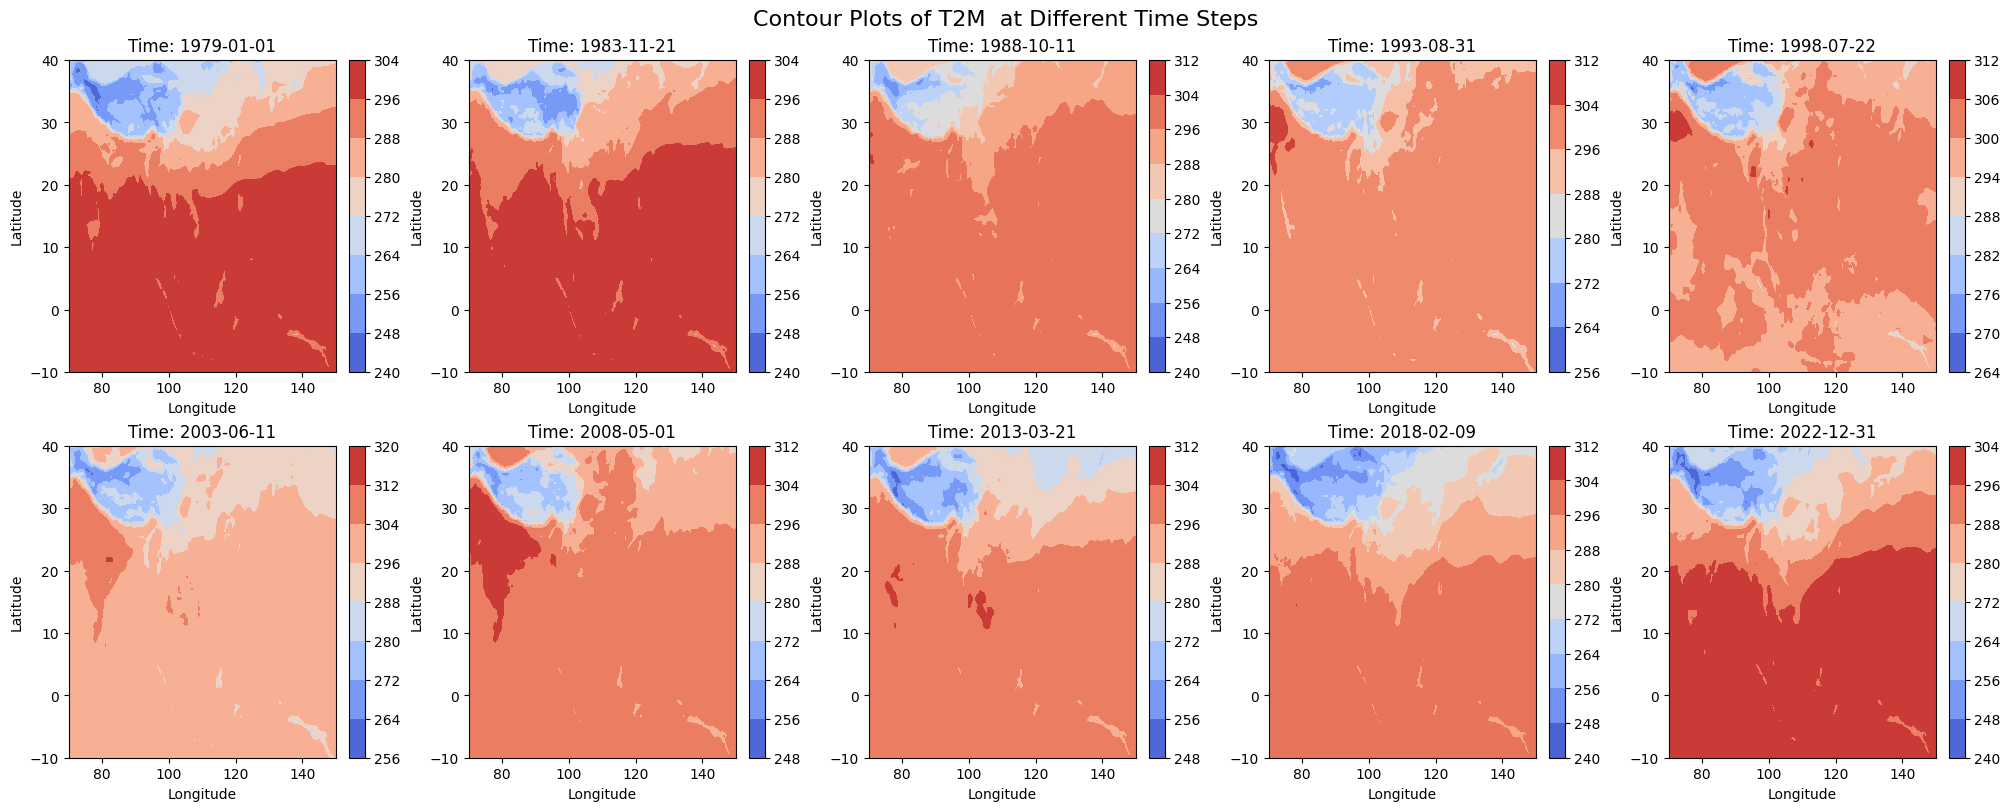

In [9]:
time_indices = np.linspace(0, len(ds.time) - 1, 10, dtype=int)
selected_times = ds.time[time_indices]

# Create figure and axes for 2x5 subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), constrained_layout=True)

# Plot each selected time step
for ax, time in zip(axes.flat, selected_times):
    data_slice = ds.t2m.sel(time=time)  # Select data for the given time

    # Create contour plot
    contour = ax.contourf(ds.longitude, ds.latitude, data_slice, cmap="coolwarm")
    fig.colorbar(contour, ax=ax)

    # Titles and labels
    ax.set_title(f"Time: {np.datetime_as_string(time.values, unit='D')}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

# Show the plot
plt.suptitle("Contour Plots of T2M  at Different Time Steps", fontsize=16)
plt.show()

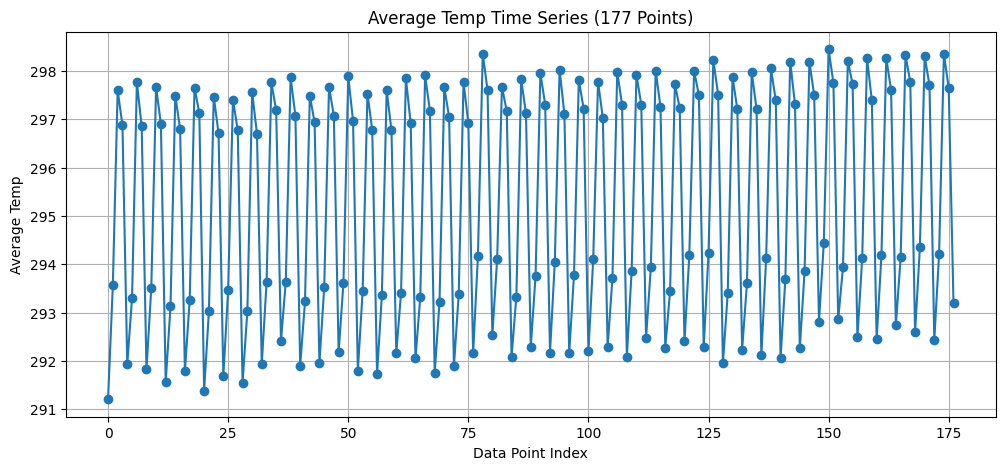

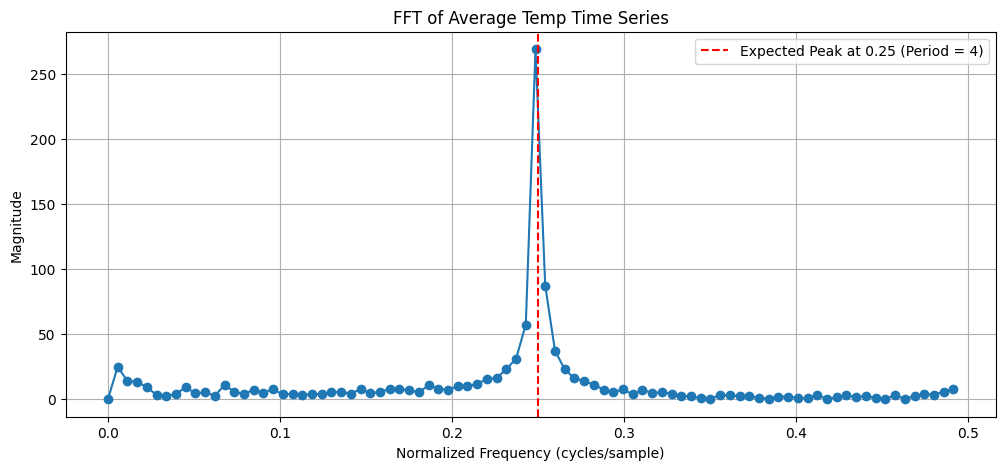

In [10]:
ds['time'] = ds.time.astype('datetime64[M]')
three_month_avg = ds.t2m.resample(time="3ME").mean()
flattened = three_month_avg.stack(points=('latitude', 'longitude')).transpose('points', 'time')
df_final = flattened.to_pandas()

avg_slp_series = df_final.mean(axis=0).values
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(avg_slp_series)), avg_slp_series, marker='o')
plt.xlabel('Data Point Index')
plt.ylabel('Average Temp')
plt.title('Average Temp Time Series (177 Points)')
plt.grid()
plt.show()

detrended_avg = avg_slp_series - np.mean(avg_slp_series)
fft_result = np.fft.fft(detrended_avg)
freqs = np.fft.fftfreq(len(fft_result), d=1)  
magnitude = np.abs(fft_result)
plt.figure(figsize=(12, 5))
plt.plot(freqs[:len(freqs)//2], magnitude[:len(freqs)//2], marker='o')
plt.axvline(x=0.25, color='r', linestyle='--', label='Expected Peak at 0.25 (Period = 4)')
plt.xlabel('Normalized Frequency (cycles/sample)')
plt.ylabel('Magnitude')
plt.title('FFT of Average Temp Time Series')
plt.legend()
plt.grid()
plt.show()


c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


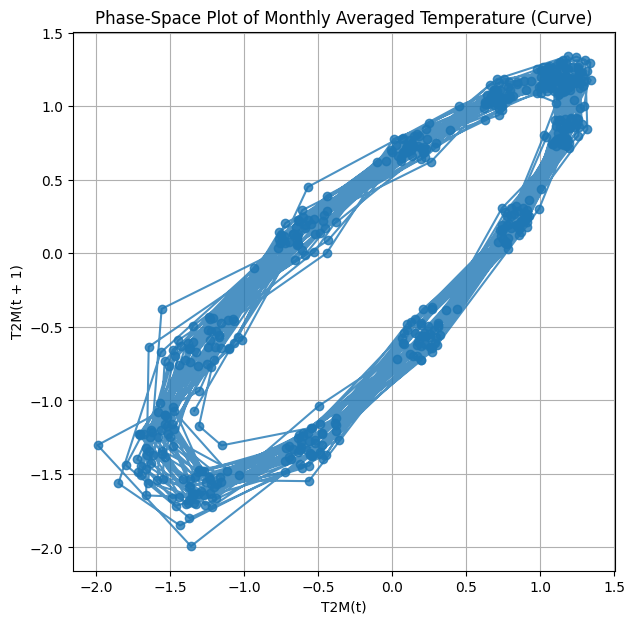

In [11]:
monthly_mean = ds.t2m.resample(time='1M').mean()
spatial_avg = monthly_mean.mean(dim=['latitude', 'longitude'])
detrended = signal.detrend(spatial_avg.values)
normalized = (detrended - np.mean(detrended)) / np.std(detrended)
tau = 1  # Lag of 1 month
plt.figure(figsize=(7, 7))
plt.plot(normalized[:-tau], normalized[tau:], linestyle='-', marker='o', alpha=0.8)
plt.xlabel(f'T2M(t)')
plt.ylabel(f'T2M(t + {tau})')
plt.title('Phase-Space Plot of Monthly Averaged Temperature (Curve)')
plt.grid()
plt.show()

c:\Users\chint\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


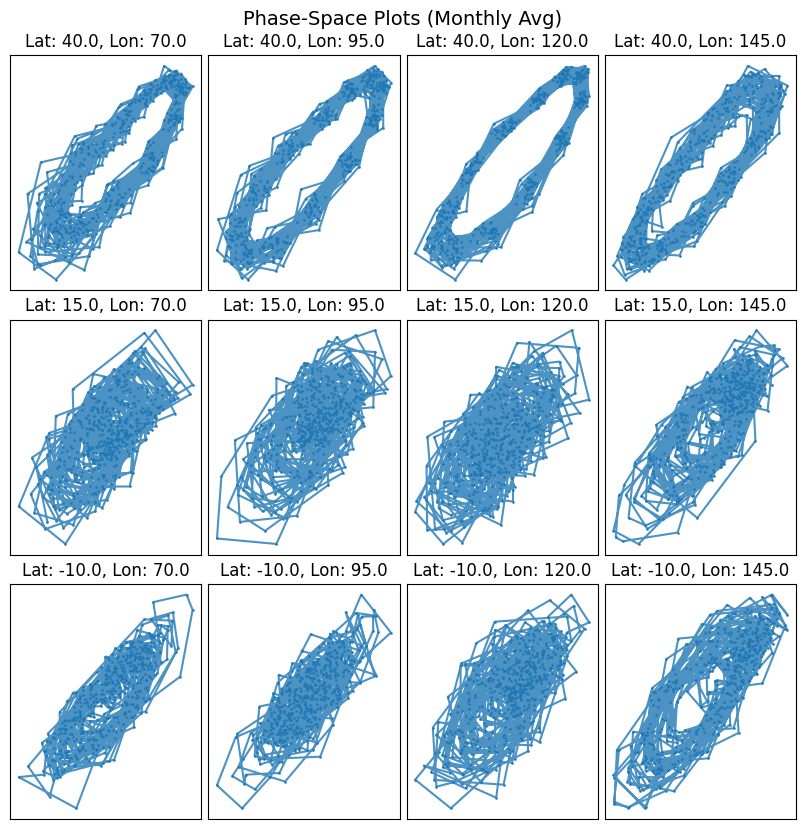

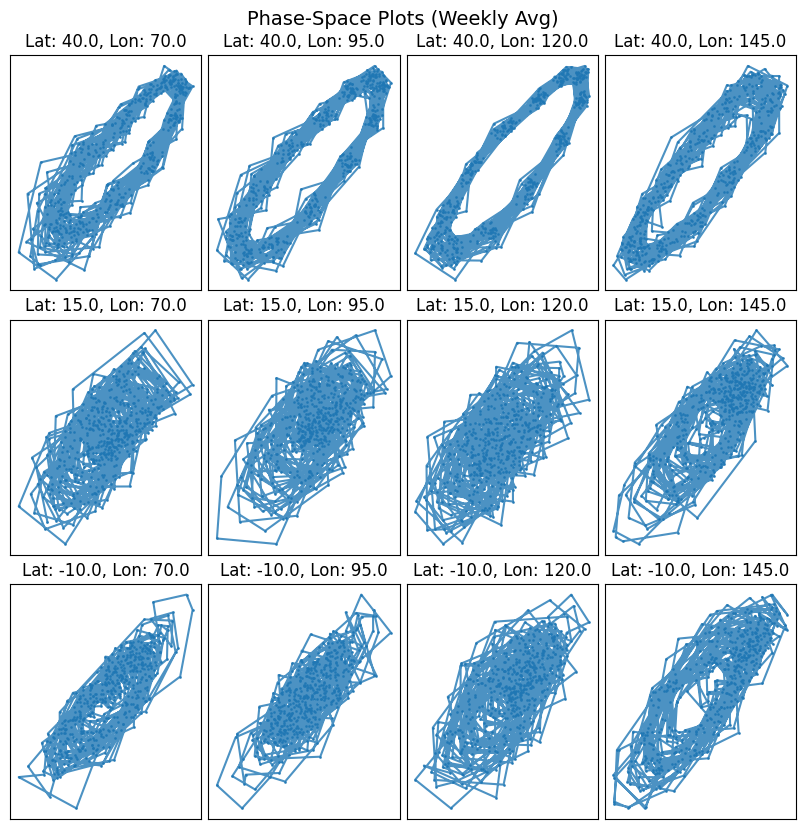

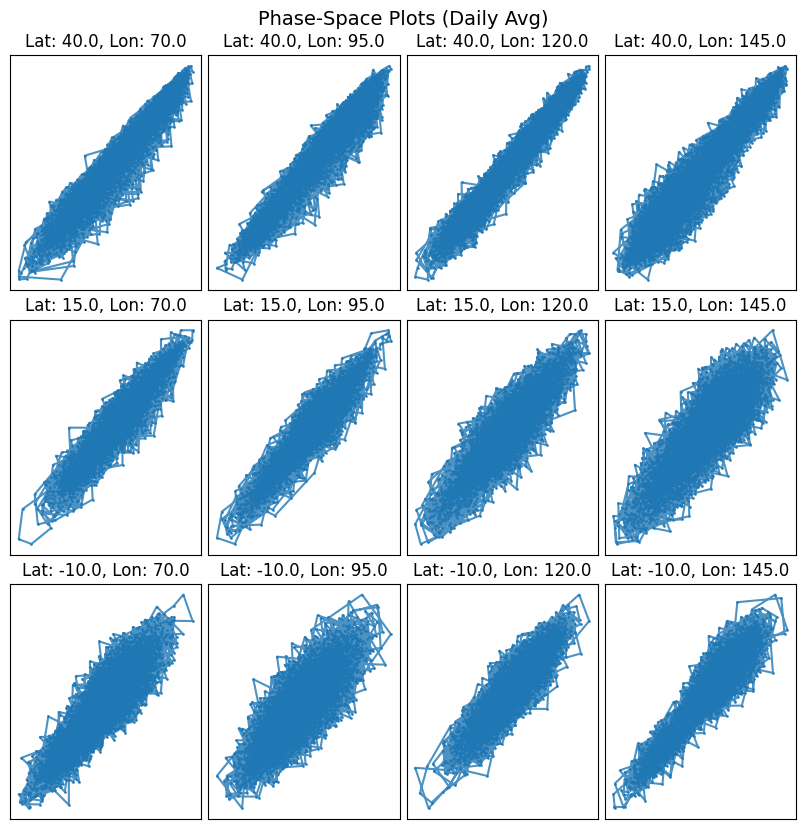

In [12]:
lat_vals = ds.latitude.values
lon_vals = ds.longitude.values
selected_lats = lat_vals[::50]  # Select every 50th latitude
selected_lons = lon_vals[::50]  # Select every 50th longitude

# Temporal scales: Monthly, Weekly, Daily
temporal_scales = {
    "Monthly": ds.t2m.resample(time="1M").mean().dropna(dim='time'),
    "Weekly": ds.t2m.resample(time="1W").mean().dropna(dim='time'),
    "Daily": ds.t2m.dropna(dim='time'),
}

# Create phase-space plots for each temporal scale
for scale_name, scale_data in temporal_scales.items():
    fig, axs = plt.subplots(len(selected_lats), len(selected_lons), figsize=(8, 8))
    
    for i, lat in enumerate(selected_lats):
        for j, lon in enumerate(selected_lons):
            # Extract SLP time series at (lat, lon)
            point_slp = scale_data.sel(latitude=lat, longitude=lon, method="nearest").values
            
            # Normalize (NO detrending for simplicity)
            normalized = (point_slp - np.mean(point_slp)) / np.std(point_slp)
            
            # Phase-Space Plot with lag τ=1
            tau = 1  # Lag of 1 time step (depends on temporal scale)
            axs[i, j].plot(normalized[:-tau], normalized[tau:], linestyle="-", marker=".", markersize=2, alpha=0.8)
            axs[i, j].set_title(f"Lat: {lat:.1f}, Lon: {lon:.1f}")
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])

    # Adjust layout and add a title for the current temporal scale
    plt.subplots_adjust(wspace=0.1, hspace=0.1)  # Reduce space between subplot
    plt.tight_layout(pad=0.5)  # Adjust padding
    plt.suptitle(f"Phase-Space Plots ({scale_name} Avg)", fontsize=14, y=1.02)
    plt.show()